In [15]:
#回帰

#機械学習を活用した回帰の流れ
#1．課題把握とゴールの設定
#2.必要なライブラリのインポート
#3.データセットの準備
#4.予測モデルの学習
#5.予測モデルの評価
#6.予測

In [16]:
#1．課題把握とゴールの設定
#今回は、chapter9で使用した住宅価格のデータセットを用いて、住宅価格を予測する回帰モデルを構築します。

#課題
#カリフォルニアの住宅に関するデータ（所得、築年数、部屋数など）から、住宅価格を予測したい。
#住宅価格は、主にどの要素から影響を受けているか知りたい。

#分析のゴール
#住宅価格を予測するモデルを構築する。
#住宅価格に影響を与える要素を特定する。

In [17]:
#2.必要なライブラリのインポート
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib

In [18]:
#3.データセットの準備
df = pd.read_csv('california_housing_cleansing.csv')
df.head()

#CSVファイルを読み込むとき
#同じフォルダにCSVがある　→　ファイル名だけでOK
#別のフォルダにCSVがある　→　ファイルパスを指定する必要がある
#例）dataフォルダの中にCSVがある場合　→　data/california_housing_cleansing.csv
                 

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [19]:
df.shape

(18572, 8)

In [20]:
#取り込んだデータを説明変数xと目的変数yに分けましょう！
#この時、データセットはpandasのDataFrame形式でも、NumPyのndarray形式でもどちらでも構いません。
#ただ、機械学習のライブラリは、内部にNumPyのndarray形式を使用していることが多いです。
#グラフやデータの中身を見たいときは、pandasのDataFrame形式を使用し、
#Aiに計算させるときは、NumPyのndarray形式を使用しましょう！

x = df.drop(columns=['住宅価格']).to_numpy()
y = df['住宅価格'].to_numpy()
#to_numpy()は、pandasのDataFrameやSeriesをNumPyのndarrayに変換するメソッドです。

#このｘとｙを学習データとテストデータに分割しましょう！
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

#データの中身を確認しましょう
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13000, 7) (13000,)
(5572, 7) (5572,)


In [21]:
#4.予測モデルの学習
#今回は重回帰で分析を行いましょう！scikit-learnのLinearRegressionクラスを活用できます。

from sklearn.linear_model import LinearRegression
model = LinearRegression() #モデルのインスタンスを作成

model.fit(x_train, y_train) #モデルの学習

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
#5.予測モデルの評価
#決定係数を用いて予測モデルの評価を行いましょう！

#scoreメソッドを使用して、決定係数を出力します！
print(model.score(x_train, y_train))  # 学習データに対する決定係数
print(model.score(x_test, y_test))    # テストデータに対する決定係数

#学習データで算出した決定係数と、テストデータで算出した決定係数を比較した際に、
#テストデータで算出した決定係数の方が大幅に低い場合は、過学習の可能性があります。
#今回は、学習データ・テストデータともに、決定係数が0.6程度であるため、過学習の可能性は低いと考えられます。

0.5937255308250555
0.5892113087334503


In [24]:
#6.予測
#サンプルデータを用いて、住宅価格を予測してみましょう！
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])

model.predict(X_new)

array([3.24081846, 1.37885722, 1.20834877])

In [ ]:
#7.設定したゴールに対する考察

#各要素が住宅価格に与える影響
print(model.coef_)  # 各要素の係数を表示します
#結果は、列の順番に対応しています。


[ 3.98281302e-01  6.10447453e-03  6.99272712e-06 -4.04133846e-01
 -4.07517265e-01 -1.74269660e-01  1.27570112e+00]


<Axes: >

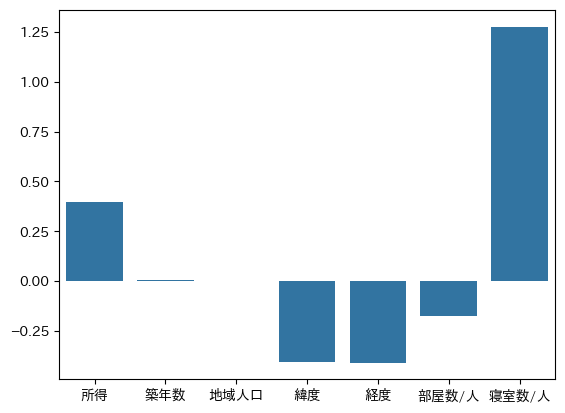

In [26]:
#各要素の重みをグラフにしてみましょう
sns.barplot(x=['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)

In [27]:
df.describe()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,3.693262,26.983847,1470.392957,35.593231,-119.484929,1.896076,1.936448,0.398033
std,1.570045,11.431815,1162.944307,2.147712,1.980865,0.957902,1.122496,0.242479
min,0.499900,1.000000,3.000000,32.540000,-124.300000,0.149990,0.002547,0.000670
25%,2.537275,17.000000,811.000000,33.920000,-121.550000,1.154000,1.490197,0.311688
50%,3.468350,27.000000,1203.000000,34.240000,-118.450000,1.712000,1.905719,0.366856
75%,4.616100,36.000000,1781.000000,37.670000,-117.970000,2.432250,2.239138,0.435936
max,15.000100,51.000000,35682.000000,41.950000,-114.310000,5.000000,55.222222,14.194444


In [ ]:
#各データの基本統計量を確認してみると、
#一概に寝室数/人の係数が大きいからといって、寝室数/人が住宅価格に与える影響が大きいとは言えないことがわかります。
#回帰とは2でスケールの統一を行い、改善を目指しましょう！